<h1 style="text-align: center;">✨THE LUSCHER ZETA FUNCTION✨</h1>


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import lpmv, factorial
from numba import njit, prange
import scipy.integrate as spi
import scipy.special as sp

The Luscher Zeta function: $Z_\ell(s, q^2) = \sum_{\mathbf{n} \in \mathbb{Z}^3} \frac{Y_\ell(\hat{\mathbf{n}})e^{-\alpha (n^2 - q^2)}}{(|\mathbf{n}|^2 - q^2)^s} + I{(q^2)}$

We will begin with the infinite sum term. $Z_\ell(s, q^2) = \sum_{\mathbf{n} \in \mathbb{Z}^3} \frac{Y_\ell(\hat{\mathbf{n}})e^{-\alpha (n^2 - q^2)}}{(|\mathbf{n}|^2 - q^2)^s} $. (Equation 3.30 in https://doi.org/10.1016/0550-3213(91)90366-6)

To code the infinite sum, we implement the Pavé summation.We are summing over increasingly larger cubes in $Z^3$ while taking advantage of symmetry.

In [14]:
@njit
def norm_squared(x, y, z):
    return x*x + y*y + z*z


@njit(parallel=True)
def Z_00(q2, L_max, epsilon=1e-6, l=0):
    Z_value = 0.0 + 0.0j

    for x in prange(-L_max, L_max + 1):  
        for y in range(-L_max, L_max + 1):
            for z in range(-L_max, L_max + 1):
                r2 = norm_squared(x, y, z)
                if r2 >= L_max**2:
                    continue
                
                if r2 == 0 and abs(q2) >= 1e-12:
                    Z_value += (-1.0 / q2) * r2**(l / 2)
                    continue
                
                denominator = (r2 - q2) + epsilon * 1j
                Z_value += (r2**(l / 2)) / denominator

    return (Z_value.real - 4.*np.pi*L_max) / np.sqrt(4 * np.pi) # /sqrt{4 * pi} bc of Y_{lm}

In [15]:
# Define the function for computing Z_00 for a range of q² values
def compute_Z_00_for_q2(q2, L_max, epsilon):
    return Z_00(q2, L_max, epsilon)

# Range of q^2 values
q2_values = np.linspace(-4, 8, 3200)
Z_values = [compute_Z_00_for_q2(q2, L_max=40, epsilon=1e-6) for q2 in q2_values]

@njit
def generate_lattice_points(L_max): # for vertical dashed lines
    unique_squared_norms = set()
    for x in range(-L_max, L_max + 1):
        for y in range(-L_max, L_max + 1):
            for z in range(-L_max, L_max + 1):
                unique_squared_norms.add(norm_squared(x, y, z))
    return sorted(unique_squared_norms)

n_squared_values = generate_lattice_points(L_max=30) # Energy levels


Plot over the dimensionless momentum. $\tilde{q} = q L / 2π$

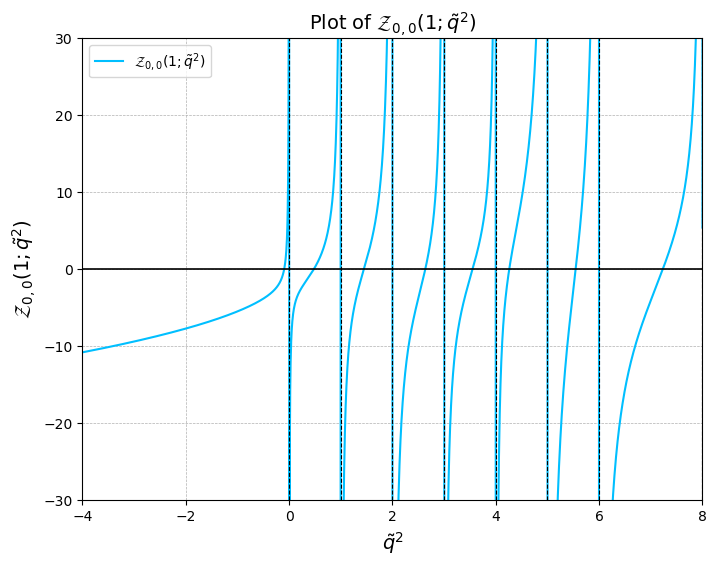

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(q2_values, Z_values, color='deepskyblue', linewidth=1.5, label=r'$\mathcal{Z}_{0,0}(1; \tilde{q}^2)$')

for n2 in [0, 1, 2, 3, 4, 5, 6, 8]:
    plt.axvline(n2, color='k', linestyle='dashed', linewidth=0.8)

plt.axhline(0, color='black', linewidth=1.2)
plt.xlabel(r'$\tilde{q}^2$', fontsize=14)
plt.ylabel(r'$\mathcal{Z}_{0,0}(1; \tilde{q}^2)$', fontsize=14)
plt.title(r'Plot of $\mathcal{Z}_{0,0}(1; \tilde{q}^2)$', fontsize=14)
plt.ylim(-30, 30)
plt.xlim(-4, 8)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

The function $ \mathcal{Z}_{0,0}(1; \tilde{q}^2) $ is computed as: $ \mathcal{Z}_{l,m}(s; \tilde{q}^2) = \sum_{\mathbf{n}} \frac{|\mathbf{n}|^l Y_{lm}(\Omega_n)}{[|\mathbf{n}|^2 - \tilde{q}^2]^s} $

The vertical dashed lines in the plot below denote the positions of the poles of the function, corresponding to the **non-interacting energy-eigenvalues**